In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


In [3]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data')
df.columns = ["sex",
              "length",
              "diameter",
              "height",
              "whole-weight",
              "shucked-weight",
              "viscera-weight",
              "shell-weight",
              "rings",
              ]


In [4]:
types = df.dtypes
print(types)

sex                object
length            float64
diameter          float64
height            float64
whole-weight      float64
shucked-weight    float64
viscera-weight    float64
shell-weight      float64
rings               int64
dtype: object


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
names = df.columns.values.tolist()
for i in range(len(types)):
    le.fit_transform(df[names[i]])
    df[names[i]] = le.transform(df[names[i]])
print(df.dtypes)

sex               int32
length            int64
diameter          int64
height            int64
whole-weight      int64
shucked-weight    int64
viscera-weight    int64
shell-weight      int64
rings             int64
dtype: object


In [6]:
X = df.values[:, :-1]
y = df['rings']

In [8]:
print(X.shape)
print(y.shape)

(4176, 8)
(4176,)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.3)


In [10]:
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.5681080096117782


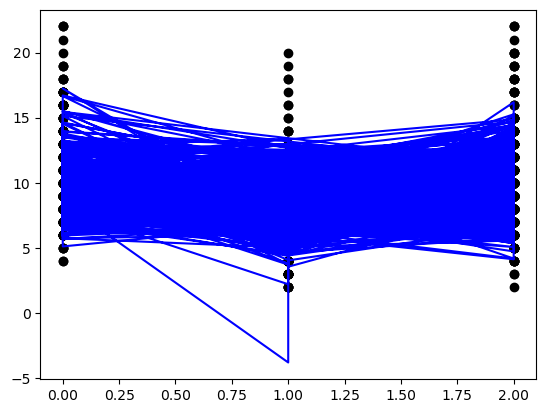

In [22]:
import matplotlib.pyplot as plt
y_pred = regr.predict(X_test)
plt.scatter(X_test[:, 0], y_test, color="black")
plt.plot(X_test[:, 0], y_pred, color="blue")

plt.show()

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=100)
model.fit(X_train, y_train)

y_pred_kNN = model.predict(X_test)


f:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [29]:
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score')
print('linear reg: ',r2_score(y_test, y_pred))
print('kNN: ',r2_score(y_test, y_pred_kNN))

print()

print('MSE')
print('linear reg: ',mean_squared_error(y_test, y_pred))
print('kNN', mean_squared_error(y_test, y_pred_kNN))

r2 score
linear reg:  0.5681080096117782
kNN:  0.27315213968120655

MSE
linear reg:  4.874040976337038
kNN 8.202713487629689
